# An agent to play TicTacToe 6x6 - Monte Carlo Tree Search (MCTS) aided by Acto-Critic RL Agent (alphazero)

## To play with a pretrained model, jump straight to step 3, to train the alphazero agent follow the steps below

### Step 1 Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from math import *
import numpy as np
import random

### Step 2 Training loop

In [2]:
# Train the agent
from ConnectN import ConnectN
from Policy_6by6 import Policy

from collections import deque
import MCTSwithRL

# initialize alphazero agent and optimizer
import torch.optim as optim

episodes = 5000 #50000
outcomes = []
policy_loss = []

game_setting = {'size':(6,6), 'N':4, 'pie_rule':True}

!pip install progressbar
import progressbar as pb
widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]
timer = pb.ProgressBar(widgets=widget, maxval=episodes).start()

policy = Policy()
optimizer = optim.Adam(policy.parameters(), lr=.005, weight_decay=1.e-5)

Nmax = 1000 #2000

for e in range(episodes):
    mytree = MCTSwithRL.Node(ConnectN(**game_setting))
    logterm = []
    vterm = []
    
    while mytree.outcome is None:
        for _ in range(Nmax):
            mytree.explore(policy)
            if mytree.N >= Nmax:
                break
            
        current_player = mytree.game.player
        mytree, (v, nn_v, p, nn_p) = mytree.next()
        mytree.detach_mother()
        
        loglist = torch.log(nn_p)*p
        constant = torch.where(p>0, p*torch.log(p),torch.tensor(0.))
        logterm.append(-torch.sum(loglist-constant))

        vterm.append(nn_v*current_player)
        
    # we compute the "policy_loss" for computing gradient
    outcome = mytree.outcome
    outcomes.append(outcome)
    
    loss = torch.sum( (torch.stack(vterm)-outcome)**2 + torch.stack(logterm) )
    optimizer.zero_grad()
    loss.backward()
    policy_loss.append(float(loss))

    optimizer.step()
    
    if e%10==0:
        print("game: ",e+1, ", mean loss: {:3.2f}".format(np.mean(policy_loss[-20:])),
              ", recent outcomes: ", outcomes[-10:])
    
    if e%500==0:
        torch.save(policy,'policy_6-6-4-pie-{:d}_tictactoe.pth'.format(e))
    del loss
    
    timer.update(e+1)
    
timer.finish()

print("done")


/Users/tamoghnadas/github_new/RL_Projects_my_own/alphazero-TicTacToe/MCTSwithRL.py:71: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/IndexingUtils.h:28.)
  return game.available_moves(), tinv(prob)[mask].view(-1), v.squeeze().squeeze()#reverse rot/reflection is applied on prob
/Users/tamoghnadas/opt/anaconda3/envs/pytorch1/lib/python3.8/site-packages/torch/autograd/__init__.py:197: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/IndexingUtils.h:28.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


game:  1 , mean loss: 15.26 , recent outcomes:  [1]


game:  11 , mean loss: 18.69 , recent outcomes:  [-1, 1, 1, -1, 1, 1, -1, -1, -1, -1]


game:  21 , mean loss: 22.45 , recent outcomes:  [1, 1, -1, 1, -1, -1, -1, 1, -1, 1]


game:  31 , mean loss: 21.39 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  41 , mean loss: 18.14 , recent outcomes:  [-1, -1, 1, 1, -1, 1, -1, -1, -1, -1]


game:  51 , mean loss: 21.16 , recent outcomes:  [-1, -1, -1, -1, 1, -1, -1, 1, 1, 1]


game:  61 , mean loss: 25.66 , recent outcomes:  [-1, 1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  71 , mean loss: 23.97 , recent outcomes:  [-1, 1, -1, -1, -1, -1, 1, -1, -1, -1]


game:  81 , mean loss: 19.11 , recent outcomes:  [1, -1, 1, 1, -1, -1, -1, -1, 1, -1]


game:  91 , mean loss: 15.51 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  101 , mean loss: 16.18 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, -1, -1, 1]


game:  111 , mean loss: 20.93 , recent outcomes:  [1, 1, -1, -1, 1, 1, -1, 1, 1, -1]


game:  121 , mean loss: 19.86 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, -1, -1, 1]


game:  131 , mean loss: 16.93 , recent outcomes:  [1, 1, -1, -1, 1, -1, 1, -1, -1, 1]


game:  141 , mean loss: 15.58 , recent outcomes:  [1, 1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  151 , mean loss: 16.01 , recent outcomes:  [1, -1, 1, -1, -1, -1, -1, -1, 1, 1]


game:  161 , mean loss: 16.72 , recent outcomes:  [-1, -1, 1, -1, -1, -1, 1, 1, 1, -1]


game:  171 , mean loss: 16.52 , recent outcomes:  [1, -1, -1, 1, -1, 1, 1, 1, -1, 1]


game:  181 , mean loss: 15.03 , recent outcomes:  [-1, 1, 1, -1, 1, 1, 1, -1, 1, -1]


game:  191 , mean loss: 15.94 , recent outcomes:  [1, 1, 1, -1, 1, -1, -1, 1, -1, 1]


game:  201 , mean loss: 18.26 , recent outcomes:  [1, 1, 1, -1, 1, 1, 1, -1, 1, 1]


game:  211 , mean loss: 17.09 , recent outcomes:  [-1, 1, -1, -1, -1, 1, -1, 1, -1, -1]


game:  221 , mean loss: 15.25 , recent outcomes:  [1, 1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  231 , mean loss: 16.14 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, 1, 1, -1]


game:  241 , mean loss: 20.53 , recent outcomes:  [1, -1, 1, 1, -1, -1, -1, -1, -1, 1]


game:  251 , mean loss: 21.89 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  261 , mean loss: 17.78 , recent outcomes:  [-1, 1, -1, 1, -1, -1, -1, 1, -1, -1]


game:  271 , mean loss: 15.55 , recent outcomes:  [1, 1, -1, -1, -1, -1, 1, -1, -1, 1]


game:  281 , mean loss: 15.96 , recent outcomes:  [1, -1, 1, -1, -1, -1, -1, -1, -1, 1]


game:  291 , mean loss: 17.75 , recent outcomes:  [1, -1, -1, 1, -1, -1, 1, -1, 1, -1]


game:  301 , mean loss: 18.65 , recent outcomes:  [1, 1, 1, 1, -1, -1, -1, 1, -1, -1]


game:  311 , mean loss: 16.39 , recent outcomes:  [-1, -1, 1, -1, 1, 1, -1, 1, 1, 1]


game:  321 , mean loss: 19.52 , recent outcomes:  [1, 1, 1, -1, 1, -1, 1, 1, -1, 1]


game:  331 , mean loss: 21.62 , recent outcomes:  [-1, -1, -1, -1, -1, 1, 1, 1, -1, -1]


game:  341 , mean loss: 20.90 , recent outcomes:  [1, 1, 1, 1, -1, 1, 1, 0, 1, -1]


game:  351 , mean loss: 23.53 , recent outcomes:  [1, 1, 1, 1, -1, -1, -1, 1, 1, 1]


game:  361 , mean loss: 22.27 , recent outcomes:  [-1, 1, -1, 1, 1, 1, -1, 1, -1, -1]


game:  371 , mean loss: 20.01 , recent outcomes:  [1, -1, 1, 1, 1, -1, -1, 1, -1, -1]


game:  381 , mean loss: 20.15 , recent outcomes:  [1, 1, 1, 1, 1, 1, -1, 1, 1, -1]


game:  391 , mean loss: 23.04 , recent outcomes:  [1, 1, 1, -1, 1, -1, -1, 1, 1, -1]


game:  401 , mean loss: 22.75 , recent outcomes:  [-1, -1, 1, 1, -1, -1, 1, -1, 1, -1]


game:  411 , mean loss: 21.02 , recent outcomes:  [1, 1, -1, 1, 1, 1, 1, -1, 1, -1]


game:  421 , mean loss: 23.75 , recent outcomes:  [-1, -1, -1, 1, -1, 1, -1, -1, 1, -1]


game:  431 , mean loss: 23.95 , recent outcomes:  [-1, -1, -1, 1, -1, 1, -1, -1, 1, 1]


game:  441 , mean loss: 23.96 , recent outcomes:  [1, -1, -1, 1, 1, -1, -1, 0, -1, -1]


game:  451 , mean loss: 24.20 , recent outcomes:  [-1, -1, 1, 1, -1, 0, -1, -1, -1, 1]


game:  461 , mean loss: 21.99 , recent outcomes:  [1, -1, -1, -1, 1, 1, -1, -1, 1, -1]


game:  471 , mean loss: 22.34 , recent outcomes:  [1, -1, -1, -1, 1, -1, 1, 0, -1, -1]


game:  481 , mean loss: 21.16 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, 1, -1, -1]


game:  491 , mean loss: 21.92 , recent outcomes:  [1, -1, 1, 1, 1, -1, 1, -1, 1, -1]


game:  501 , mean loss: 25.47 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, 1, 1, -1]


game:  511 , mean loss: 23.94 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, 1]


game:  521 , mean loss: 22.63 , recent outcomes:  [1, -1, 1, 1, -1, -1, -1, 1, -1, -1]


game:  531 , mean loss: 20.76 , recent outcomes:  [-1, 1, 1, 1, 1, 1, 1, 1, -1, -1]


game:  541 , mean loss: 22.77 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, 1, -1, 1]


game:  551 , mean loss: 24.50 , recent outcomes:  [-1, -1, 0, -1, -1, -1, -1, -1, -1, -1]


game:  561 , mean loss: 21.93 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, 1, 1, -1]


game:  571 , mean loss: 19.30 , recent outcomes:  [-1, -1, 1, -1, -1, 0, -1, -1, -1, -1]


game:  581 , mean loss: 21.92 , recent outcomes:  [0, 1, -1, 1, -1, 1, -1, -1, -1, -1]


game:  591 , mean loss: 23.54 , recent outcomes:  [-1, -1, 0, -1, 1, -1, -1, -1, -1, -1]


game:  601 , mean loss: 19.31 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  611 , mean loss: 17.55 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  621 , mean loss: 19.35 , recent outcomes:  [-1, -1, -1, 1, 1, -1, -1, 0, 0, -1]


game:  631 , mean loss: 22.80 , recent outcomes:  [-1, -1, 1, 0, 1, -1, -1, 1, 1, -1]


game:  641 , mean loss: 22.89 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, 1, 1, 0]


game:  651 , mean loss: 17.41 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, 0]


game:  661 , mean loss: 20.85 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, 1, 1, 1]


game:  671 , mean loss: 28.00 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, 1]


game:  681 , mean loss: 24.13 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, 1, -1, -1]


game:  691 , mean loss: 23.16 , recent outcomes:  [1, 1, -1, -1, 0, -1, -1, -1, -1, -1]


game:  701 , mean loss: 21.63 , recent outcomes:  [0, -1, -1, 1, 0, -1, -1, -1, -1, -1]


game:  711 , mean loss: 20.16 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 0, 1, -1, 1]


game:  721 , mean loss: 19.17 , recent outcomes:  [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1]


game:  731 , mean loss: 21.98 , recent outcomes:  [-1, -1, 1, -1, 1, -1, -1, 1, -1, -1]


game:  741 , mean loss: 29.56 , recent outcomes:  [-1, -1, 1, 1, -1, -1, 1, 1, 1, -1]


game:  751 , mean loss: 25.21 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, -1, -1, -1]


game:  761 , mean loss: 20.03 , recent outcomes:  [-1, -1, -1, -1, 1, -1, -1, -1, 1, -1]


game:  771 , mean loss: 22.37 , recent outcomes:  [1, -1, -1, -1, 1, -1, -1, -1, -1, -1]


game:  781 , mean loss: 22.71 , recent outcomes:  [-1, -1, -1, 0, -1, -1, 0, -1, -1, -1]


game:  791 , mean loss: 22.92 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, 1, 1, -1]


game:  801 , mean loss: 24.43 , recent outcomes:  [-1, 1, 1, 1, -1, -1, 0, -1, 1, -1]


game:  811 , mean loss: 23.59 , recent outcomes:  [1, 1, -1, -1, 0, -1, -1, -1, -1, -1]


game:  821 , mean loss: 19.58 , recent outcomes:  [-1, -1, -1, 0, -1, 0, -1, -1, -1, -1]


game:  831 , mean loss: 17.73 , recent outcomes:  [1, -1, -1, -1, -1, -1, 0, -1, -1, 1]


game:  841 , mean loss: 20.51 , recent outcomes:  [-1, 1, 1, -1, -1, 0, -1, 1, -1, -1]


game:  851 , mean loss: 24.00 , recent outcomes:  [-1, 1, 1, 1, 1, -1, -1, -1, 1, -1]


game:  861 , mean loss: 23.05 , recent outcomes:  [0, 1, -1, -1, 1, -1, -1, -1, 1, -1]


game:  871 , mean loss: 18.52 , recent outcomes:  [1, -1, -1, 1, -1, -1, 0, -1, -1, -1]


game:  881 , mean loss: 16.97 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, 1, -1, 1]


game:  891 , mean loss: 17.86 , recent outcomes:  [-1, -1, 1, -1, -1, 1, -1, -1, -1, 1]


game:  901 , mean loss: 20.50 , recent outcomes:  [-1, -1, 1, -1, -1, -1, 0, -1, -1, 1]


game:  911 , mean loss: 19.32 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, -1, -1]


game:  921 , mean loss: 18.91 , recent outcomes:  [-1, 1, 1, -1, -1, -1, -1, 0, 1, 0]


game:  931 , mean loss: 24.59 , recent outcomes:  [1, -1, 1, -1, -1, -1, 1, 1, -1, -1]


game:  941 , mean loss: 23.60 , recent outcomes:  [-1, 1, 1, 1, -1, -1, -1, 1, 1, 1]


game:  951 , mean loss: 22.81 , recent outcomes:  [1, 1, 1, 1, -1, 1, 1, 1, -1, -1]


game:  961 , mean loss: 21.84 , recent outcomes:  [-1, 1, -1, -1, 1, -1, -1, 1, -1, 1]


game:  971 , mean loss: 19.26 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, 1, -1, -1]


game:  981 , mean loss: 16.88 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  991 , mean loss: 16.70 , recent outcomes:  [1, 1, 1, -1, 1, -1, 1, 1, -1, 1]


game:  1001 , mean loss: 22.03 , recent outcomes:  [-1, -1, -1, 1, 1, -1, -1, -1, -1, -1]


game:  1011 , mean loss: 20.78 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, -1, 1]


game:  1021 , mean loss: 19.19 , recent outcomes:  [-1, -1, 0, -1, 1, -1, -1, -1, -1, 1]


game:  1031 , mean loss: 18.76 , recent outcomes:  [-1, -1, 1, -1, 0, -1, 1, 1, -1, -1]


game:  1041 , mean loss: 17.61 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, 1]


game:  1051 , mean loss: 17.77 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, 1, -1]


game:  1061 , mean loss: 14.36 , recent outcomes:  [-1, -1, 1, -1, 1, -1, -1, -1, -1, -1]


game:  1071 , mean loss: 14.31 , recent outcomes:  [0, -1, -1, -1, 1, -1, -1, 1, -1, -1]


game:  1081 , mean loss: 20.53 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, -1, 1, -1]


game:  1091 , mean loss: 19.64 , recent outcomes:  [1, -1, -1, -1, 1, -1, -1, -1, -1, -1]


game:  1101 , mean loss: 14.17 , recent outcomes:  [-1, -1, -1, 1, 1, -1, -1, -1, -1, -1]


game:  1111 , mean loss: 16.78 , recent outcomes:  [-1, -1, -1, 1, 0, 0, -1, -1, 1, -1]


game:  1121 , mean loss: 16.77 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  1131 , mean loss: 17.11 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, 1]


game:  1141 , mean loss: 19.25 , recent outcomes:  [-1, -1, 0, 1, 1, -1, 0, -1, -1, -1]


game:  1151 , mean loss: 20.44 , recent outcomes:  [1, -1, -1, -1, -1, -1, 1, 1, -1, 0]


game:  1161 , mean loss: 18.29 , recent outcomes:  [-1, -1, -1, 0, 0, -1, -1, -1, -1, -1]


game:  1171 , mean loss: 14.05 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  1181 , mean loss: 17.74 , recent outcomes:  [-1, -1, -1, -1, 0, -1, -1, 1, -1, -1]


game:  1191 , mean loss: 15.64 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  1201 , mean loss: 15.59 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, 1, 1]


game:  1211 , mean loss: 19.44 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, 0, -1, -1]


game:  1221 , mean loss: 17.87 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, 1, -1, -1]


game:  1231 , mean loss: 17.75 , recent outcomes:  [-1, 1, -1, -1, 1, -1, 1, 1, -1, -1]


game:  1241 , mean loss: 16.09 , recent outcomes:  [-1, -1, -1, 0, -1, -1, 0, 1, -1, -1]


game:  1251 , mean loss: 14.21 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, 1, -1, -1]


game:  1261 , mean loss: 16.20 , recent outcomes:  [-1, -1, -1, -1, 1, -1, -1, 0, 0, -1]


game:  1271 , mean loss: 23.52 , recent outcomes:  [-1, -1, -1, -1, -1, 0, -1, 1, -1, -1]


game:  1281 , mean loss: 27.08 , recent outcomes:  [1, 1, -1, -1, 0, 1, -1, -1, -1, 1]


game:  1291 , mean loss: 20.38 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, 0, -1, -1]


game:  1301 , mean loss: 17.73 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, 0, -1, -1]


game:  1311 , mean loss: 17.61 , recent outcomes:  [1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  1321 , mean loss: 17.54 , recent outcomes:  [0, 1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  1331 , mean loss: 18.53 , recent outcomes:  [-1, -1, 1, -1, -1, -1, 1, -1, -1, -1]


game:  1341 , mean loss: 17.85 , recent outcomes:  [-1, 0, -1, -1, -1, -1, -1, 0, -1, -1]


game:  1351 , mean loss: 22.53 , recent outcomes:  [1, -1, 1, -1, -1, -1, 1, -1, -1, -1]


game:  1361 , mean loss: 22.33 , recent outcomes:  [0, -1, -1, -1, -1, -1, 1, 1, -1, -1]


game:  1371 , mean loss: 20.65 , recent outcomes:  [-1, -1, -1, 1, -1, -1, 1, -1, -1, -1]


game:  1381 , mean loss: 22.45 , recent outcomes:  [-1, -1, -1, 0, 1, -1, -1, 1, -1, -1]


game:  1391 , mean loss: 17.79 , recent outcomes:  [-1, -1, -1, -1, -1, 0, -1, -1, 1, -1]


game:  1401 , mean loss: 19.19 , recent outcomes:  [-1, -1, -1, 1, 1, -1, -1, 1, -1, -1]


game:  1411 , mean loss: 22.93 , recent outcomes:  [-1, -1, 1, 1, 0, -1, -1, -1, -1, -1]


game:  1421 , mean loss: 18.27 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 0, -1, 0, -1]


game:  1431 , mean loss: 14.79 , recent outcomes:  [-1, -1, -1, -1, 0, -1, -1, -1, -1, 1]


game:  1441 , mean loss: 12.29 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  1451 , mean loss: 17.39 , recent outcomes:  [-1, 1, -1, -1, 1, -1, -1, 1, -1, -1]


game:  1461 , mean loss: 23.06 , recent outcomes:  [1, -1, -1, 1, -1, -1, -1, -1, -1, -1]


game:  1471 , mean loss: 18.78 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, -1, -1]


game:  1481 , mean loss: 22.45 , recent outcomes:  [1, -1, 1, -1, -1, -1, 0, 1, -1, -1]


game:  1491 , mean loss: 22.66 , recent outcomes:  [1, -1, -1, -1, -1, -1, 1, 1, -1, -1]


game:  1501 , mean loss: 15.49 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  1511 , mean loss: 15.17 , recent outcomes:  [-1, -1, 0, -1, -1, -1, 1, -1, -1, -1]


game:  1521 , mean loss: 15.07 , recent outcomes:  [-1, -1, -1, -1, 0, -1, -1, -1, 0, -1]


game:  1531 , mean loss: 11.73 , recent outcomes:  [0, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  1541 , mean loss: 15.45 , recent outcomes:  [-1, 0, -1, -1, -1, 0, -1, -1, 1, 1]


game:  1551 , mean loss: 17.52 , recent outcomes:  [-1, -1, 1, -1, 0, -1, -1, -1, -1, 0]


game:  1561 , mean loss: 13.44 , recent outcomes:  [0, 0, -1, -1, -1, -1, -1, 0, -1, -1]


game:  1571 , mean loss: 18.83 , recent outcomes:  [-1, -1, 1, -1, 1, -1, -1, -1, -1, -1]


game:  1581 , mean loss: 18.31 , recent outcomes:  [-1, -1, -1, 0, -1, -1, -1, -1, -1, 0]


game:  1591 , mean loss: 14.92 , recent outcomes:  [0, 1, -1, -1, -1, -1, 0, -1, -1, -1]


game:  1601 , mean loss: 17.88 , recent outcomes:  [1, -1, 0, -1, -1, -1, -1, -1, -1, -1]


game:  1611 , mean loss: 16.56 , recent outcomes:  [-1, -1, 0, -1, -1, -1, 1, 1, -1, -1]


game:  1621 , mean loss: 15.24 , recent outcomes:  [-1, -1, -1, 0, -1, 1, -1, -1, -1, 0]


game:  1631 , mean loss: 15.94 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, 0, -1]


game:  1641 , mean loss: 13.91 , recent outcomes:  [0, -1, -1, -1, -1, 0, 0, -1, -1, -1]


game:  1651 , mean loss: 14.04 , recent outcomes:  [-1, 1, -1, -1, 1, 0, -1, -1, -1, -1]


game:  1661 , mean loss: 17.09 , recent outcomes:  [0, -1, 1, -1, -1, -1, -1, 1, 0, -1]


game:  1671 , mean loss: 14.98 , recent outcomes:  [-1, 1, -1, -1, 0, -1, -1, -1, -1, -1]


game:  1681 , mean loss: 14.57 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, 1, -1, -1]


game:  1691 , mean loss: 13.19 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  1701 , mean loss: 10.32 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  1711 , mean loss: 15.44 , recent outcomes:  [-1, -1, -1, -1, 1, -1, 0, 1, -1, -1]


game:  1721 , mean loss: 16.96 , recent outcomes:  [-1, 0, -1, -1, -1, -1, -1, 0, 0, -1]


game:  1731 , mean loss: 19.92 , recent outcomes:  [-1, -1, -1, -1, 1, -1, -1, -1, 1, -1]


game:  1741 , mean loss: 23.11 , recent outcomes:  [-1, 0, -1, -1, -1, 1, 1, -1, -1, -1]


game:  1751 , mean loss: 21.88 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, 0, 1, -1]


game:  1761 , mean loss: 21.96 , recent outcomes:  [-1, -1, -1, 0, -1, 1, -1, 0, -1, -1]


game:  1771 , mean loss: 22.73 , recent outcomes:  [0, -1, 1, -1, -1, -1, 1, 0, -1, -1]


game:  1781 , mean loss: 20.40 , recent outcomes:  [1, -1, -1, 0, -1, -1, -1, -1, -1, -1]


game:  1791 , mean loss: 14.05 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  1801 , mean loss: 17.49 , recent outcomes:  [-1, -1, -1, -1, 1, -1, 1, 1, -1, -1]


game:  1811 , mean loss: 23.05 , recent outcomes:  [1, -1, 1, 1, -1, -1, 1, -1, 1, -1]


game:  1821 , mean loss: 18.63 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  1831 , mean loss: 16.29 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, 1, -1]


game:  1841 , mean loss: 16.67 , recent outcomes:  [-1, -1, -1, -1, -1, 0, -1, -1, -1, -1]


game:  1851 , mean loss: 13.51 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  1861 , mean loss: 10.96 , recent outcomes:  [-1, -1, -1, -1, 1, -1, -1, -1, -1, -1]


game:  1871 , mean loss: 13.77 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, -1, 1, -1]


game:  1881 , mean loss: 16.55 , recent outcomes:  [-1, -1, -1, -1, 0, 1, -1, -1, -1, 1]


game:  1891 , mean loss: 13.31 , recent outcomes:  [-1, -1, -1, -1, 0, 0, -1, -1, -1, -1]


game:  1901 , mean loss: 8.91 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  1911 , mean loss: 12.05 , recent outcomes:  [-1, 0, -1, -1, -1, 0, -1, -1, 1, -1]


game:  1921 , mean loss: 14.69 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  1931 , mean loss: 12.37 , recent outcomes:  [-1, -1, -1, -1, 1, -1, -1, -1, -1, -1]


game:  1941 , mean loss: 15.78 , recent outcomes:  [-1, -1, -1, -1, 1, -1, -1, -1, -1, 0]


game:  1951 , mean loss: 22.33 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, -1, 1, 1]


game:  1961 , mean loss: 20.11 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, -1, 1]


game:  1971 , mean loss: 15.13 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 0, 0, 1, 0]


game:  1981 , mean loss: 16.21 , recent outcomes:  [-1, -1, -1, 0, 0, 1, -1, 0, -1, -1]


game:  1991 , mean loss: 18.35 , recent outcomes:  [-1, 0, 1, -1, 1, -1, -1, -1, -1, -1]


game:  2001 , mean loss: 14.39 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2011 , mean loss: 12.60 , recent outcomes:  [1, -1, 1, -1, -1, -1, -1, -1, -1, -1]


game:  2021 , mean loss: 13.12 , recent outcomes:  [0, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2031 , mean loss: 15.89 , recent outcomes:  [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1]


game:  2041 , mean loss: 18.69 , recent outcomes:  [-1, -1, 1, -1, 1, -1, -1, -1, -1, -1]


game:  2051 , mean loss: 18.89 , recent outcomes:  [1, -1, 1, -1, -1, -1, -1, 1, -1, -1]


game:  2061 , mean loss: 17.78 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2071 , mean loss: 12.49 , recent outcomes:  [-1, -1, -1, 0, -1, -1, -1, -1, -1, 0]


game:  2081 , mean loss: 10.39 , recent outcomes:  [0, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2091 , mean loss: 8.52 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2101 , mean loss: 20.06 , recent outcomes:  [1, 1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  2111 , mean loss: 25.01 , recent outcomes:  [-1, -1, -1, -1, -1, 0, 1, -1, 1, -1]


game:  2121 , mean loss: 16.04 , recent outcomes:  [0, -1, -1, -1, -1, 1, -1, 1, -1, -1]


game:  2131 , mean loss: 12.57 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, -1, -1, -1]


game:  2141 , mean loss: 14.60 , recent outcomes:  [-1, -1, -1, -1, 0, -1, 1, 1, -1, -1]


game:  2151 , mean loss: 22.60 , recent outcomes:  [-1, 1, 1, 1, 0, 1, -1, 1, -1, 1]


game:  2161 , mean loss: 27.60 , recent outcomes:  [1, 1, 1, -1, 1, 1, -1, -1, 1, -1]


game:  2171 , mean loss: 26.57 , recent outcomes:  [-1, 1, -1, -1, -1, 1, -1, 1, 1, -1]


game:  2181 , mean loss: 25.57 , recent outcomes:  [1, 1, 1, 1, 1, -1, -1, 1, 1, -1]


game:  2191 , mean loss: 25.64 , recent outcomes:  [-1, 1, -1, -1, -1, 1, 1, -1, 1, -1]


game:  2201 , mean loss: 23.13 , recent outcomes:  [-1, -1, 1, -1, 1, -1, -1, 1, -1, -1]


game:  2211 , mean loss: 20.79 , recent outcomes:  [1, -1, 1, -1, 1, -1, -1, -1, 1, 1]


game:  2221 , mean loss: 19.81 , recent outcomes:  [1, 1, -1, -1, 1, -1, 1, -1, -1, -1]


game:  2231 , mean loss: 21.79 , recent outcomes:  [-1, -1, 1, -1, -1, 1, -1, 1, -1, -1]


game:  2241 , mean loss: 22.92 , recent outcomes:  [1, -1, -1, -1, -1, 1, -1, 1, -1, -1]


game:  2251 , mean loss: 19.37 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  2261 , mean loss: 21.08 , recent outcomes:  [-1, 1, -1, 1, -1, -1, -1, -1, 1, -1]


game:  2271 , mean loss: 23.89 , recent outcomes:  [0, 0, -1, -1, -1, 1, 1, -1, -1, 1]


game:  2281 , mean loss: 20.51 , recent outcomes:  [-1, 1, -1, -1, 1, -1, 1, -1, -1, -1]


game:  2291 , mean loss: 20.33 , recent outcomes:  [-1, 1, -1, 1, -1, -1, -1, -1, -1, -1]


game:  2301 , mean loss: 22.66 , recent outcomes:  [-1, -1, 1, -1, 1, -1, 1, -1, -1, -1]


game:  2311 , mean loss: 21.39 , recent outcomes:  [-1, 1, -1, 1, -1, -1, 1, -1, -1, -1]


game:  2321 , mean loss: 20.19 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, -1, 0, -1]


game:  2331 , mean loss: 20.67 , recent outcomes:  [-1, 0, -1, -1, -1, -1, 0, 1, 1, -1]


game:  2341 , mean loss: 20.89 , recent outcomes:  [-1, -1, 1, -1, -1, 1, -1, -1, -1, -1]


game:  2351 , mean loss: 19.96 , recent outcomes:  [-1, -1, -1, 0, 0, -1, -1, -1, -1, -1]


game:  2361 , mean loss: 20.77 , recent outcomes:  [-1, 1, -1, 1, -1, 1, -1, -1, -1, -1]


game:  2371 , mean loss: 22.99 , recent outcomes:  [-1, -1, 0, -1, 1, -1, -1, -1, 1, -1]


game:  2381 , mean loss: 20.54 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, 0, -1, 1]


game:  2391 , mean loss: 19.89 , recent outcomes:  [1, -1, -1, -1, -1, -1, 1, -1, -1, -1]


game:  2401 , mean loss: 22.54 , recent outcomes:  [1, -1, 1, 1, -1, -1, -1, -1, 1, -1]


game:  2411 , mean loss: 21.72 , recent outcomes:  [1, -1, -1, -1, -1, -1, 0, -1, 0, 1]


game:  2421 , mean loss: 21.00 , recent outcomes:  [-1, -1, 1, -1, -1, 1, -1, 1, 1, -1]


game:  2431 , mean loss: 21.91 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 0, -1, -1, 1]


game:  2441 , mean loss: 19.14 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, 0, -1]


game:  2451 , mean loss: 20.76 , recent outcomes:  [-1, -1, -1, 1, 1, -1, 1, -1, 0, -1]


game:  2461 , mean loss: 23.58 , recent outcomes:  [-1, -1, 0, -1, -1, 0, -1, 1, -1, -1]


game:  2471 , mean loss: 22.39 , recent outcomes:  [-1, 1, -1, -1, 1, 1, -1, 1, -1, -1]


game:  2481 , mean loss: 23.52 , recent outcomes:  [1, -1, -1, -1, 1, 1, 1, -1, -1, 1]


game:  2491 , mean loss: 23.99 , recent outcomes:  [1, -1, 1, 1, 1, 1, 1, -1, -1, -1]


game:  2501 , mean loss: 22.50 , recent outcomes:  [-1, -1, -1, 1, -1, 1, 1, -1, -1, -1]


game:  2511 , mean loss: 18.61 , recent outcomes:  [1, -1, -1, -1, -1, 1, -1, -1, -1, 1]


game:  2521 , mean loss: 18.44 , recent outcomes:  [1, -1, 1, 1, -1, -1, -1, -1, -1, -1]


game:  2531 , mean loss: 17.83 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, -1, -1]


game:  2541 , mean loss: 11.83 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2551 , mean loss: 15.74 , recent outcomes:  [-1, -1, -1, -1, 0, 1, -1, -1, 1, -1]


game:  2561 , mean loss: 20.72 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, -1, -1]


game:  2571 , mean loss: 16.58 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, 1, 0, -1]


game:  2581 , mean loss: 17.44 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, 0, -1, -1]


game:  2591 , mean loss: 17.65 , recent outcomes:  [-1, -1, 1, -1, 1, -1, -1, -1, -1, -1]


game:  2601 , mean loss: 12.00 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2611 , mean loss: 17.21 , recent outcomes:  [-1, -1, -1, 1, -1, 1, -1, -1, -1, 1]


game:  2621 , mean loss: 17.97 , recent outcomes:  [-1, -1, 0, -1, -1, -1, -1, -1, -1, -1]


game:  2631 , mean loss: 11.29 , recent outcomes:  [-1, -1, -1, 0, -1, -1, -1, 1, -1, -1]


game:  2641 , mean loss: 13.87 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2651 , mean loss: 11.14 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2661 , mean loss: 9.01 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2671 , mean loss: 12.69 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, 1]


game:  2681 , mean loss: 19.32 , recent outcomes:  [1, -1, 1, -1, -1, -1, 1, -1, -1, -1]


game:  2691 , mean loss: 19.45 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, -1, -1, -1]


game:  2701 , mean loss: 14.34 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2711 , mean loss: 11.22 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2721 , mean loss: 12.02 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, -1, -1]


game:  2731 , mean loss: 12.94 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2741 , mean loss: 8.99 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2751 , mean loss: 10.85 , recent outcomes:  [-1, -1, -1, 0, -1, -1, -1, -1, -1, 1]


game:  2761 , mean loss: 16.87 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, 1]


game:  2771 , mean loss: 19.92 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, -1, 1, 1]


game:  2781 , mean loss: 16.44 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2791 , mean loss: 13.54 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, -1, -1, -1]


game:  2801 , mean loss: 13.20 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2811 , mean loss: 11.95 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2821 , mean loss: 9.70 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2831 , mean loss: 6.98 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2841 , mean loss: 13.57 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1]


game:  2851 , mean loss: 15.61 , recent outcomes:  [-1, -1, -1, -1, 0, -1, -1, -1, -1, -1]


game:  2861 , mean loss: 16.79 , recent outcomes:  [1, 1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2871 , mean loss: 16.29 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2881 , mean loss: 7.02 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2891 , mean loss: 6.56 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, 1, -1, -1]


game:  2901 , mean loss: 6.67 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2911 , mean loss: 8.07 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, -1, 1]


game:  2921 , mean loss: 14.34 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, -1, -1, 0]


game:  2931 , mean loss: 13.28 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2941 , mean loss: 7.72 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2951 , mean loss: 8.77 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, 0]


game:  2961 , mean loss: 10.55 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, 0]


game:  2971 , mean loss: 11.28 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, 1, -1, -1]


game:  2981 , mean loss: 9.07 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  2991 , mean loss: 9.70 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, -1, -1]


game:  3001 , mean loss: 12.12 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  3011 , mean loss: 10.18 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, -1, -1, -1]


game:  3021 , mean loss: 11.73 , recent outcomes:  [-1, 0, -1, -1, -1, -1, -1, -1, -1, -1]


game:  3031 , mean loss: 11.00 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  3041 , mean loss: 7.49 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  3051 , mean loss: 10.31 , recent outcomes:  [-1, -1, 0, -1, 0, -1, 1, -1, -1, -1]


game:  3061 , mean loss: 17.73 , recent outcomes:  [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1]


game:  3071 , mean loss: 20.04 , recent outcomes:  [-1, -1, -1, 1, 1, 0, -1, 0, -1, -1]


game:  3081 , mean loss: 18.69 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, -1, 1, 1]


game:  3091 , mean loss: 16.65 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, 1, -1]


game:  3101 , mean loss: 13.12 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, 1, -1, -1]


game:  3111 , mean loss: 15.40 , recent outcomes:  [-1, -1, 1, -1, 1, -1, -1, 1, -1, -1]


game:  3121 , mean loss: 20.25 , recent outcomes:  [-1, -1, -1, 1, 1, -1, -1, -1, -1, 1]


game:  3131 , mean loss: 14.94 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  3141 , mean loss: 7.74 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  3151 , mean loss: 10.16 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, -1, -1, 1]


game:  3161 , mean loss: 19.00 , recent outcomes:  [-1, -1, -1, 1, -1, 1, 1, -1, -1, 1]


game:  3171 , mean loss: 18.62 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, -1, -1]


game:  3181 , mean loss: 13.57 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, -1, -1, -1]


game:  3191 , mean loss: 15.05 , recent outcomes:  [-1, 1, -1, -1, 1, -1, -1, -1, -1, -1]


game:  3201 , mean loss: 13.61 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  3211 , mean loss: 11.21 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, 1, -1, -1]


game:  3221 , mean loss: 11.68 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  3231 , mean loss: 12.17 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  3241 , mean loss: 16.29 , recent outcomes:  [-1, 0, -1, -1, 1, -1, -1, -1, 1, -1]


game:  3251 , mean loss: 21.35 , recent outcomes:  [-1, -1, -1, 1, -1, 1, -1, 1, -1, 1]


game:  3261 , mean loss: 19.48 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  3271 , mean loss: 23.23 , recent outcomes:  [1, -1, 1, -1, -1, 1, 1, 1, 1, 1]


game:  3281 , mean loss: 29.40 , recent outcomes:  [-1, 1, 1, 1, 1, 1, -1, 1, 1, 1]


game:  3291 , mean loss: 31.05 , recent outcomes:  [1, -1, 1, 1, 1, -1, 1, 1, 1, 1]


game:  3301 , mean loss: 28.58 , recent outcomes:  [1, 1, -1, 1, 1, 1, 1, -1, -1, -1]


game:  3311 , mean loss: 24.90 , recent outcomes:  [1, -1, 1, -1, 1, -1, 1, 1, 1, 1]


game:  3321 , mean loss: 24.01 , recent outcomes:  [1, 1, 1, 1, 1, 1, -1, -1, -1, -1]


game:  3331 , mean loss: 25.25 , recent outcomes:  [-1, 1, -1, 1, 1, 1, -1, 1, -1, 1]


game:  3341 , mean loss: 26.50 , recent outcomes:  [1, 1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  3351 , mean loss: 24.58 , recent outcomes:  [1, -1, 0, -1, -1, -1, 1, -1, 1, 1]


game:  3361 , mean loss: 23.92 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, 1, -1, 1]


game:  3371 , mean loss: 20.73 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  3381 , mean loss: 20.47 , recent outcomes:  [-1, -1, 1, 1, -1, -1, -1, -1, -1, 0]


game:  3391 , mean loss: 23.85 , recent outcomes:  [-1, 1, 1, -1, 1, 1, -1, -1, -1, 1]


game:  3401 , mean loss: 22.73 , recent outcomes:  [1, 1, 1, -1, -1, -1, -1, -1, -1, -1]


game:  3411 , mean loss: 20.82 , recent outcomes:  [-1, -1, 1, 1, 1, 1, -1, -1, -1, -1]


game:  3421 , mean loss: 23.42 , recent outcomes:  [1, 1, -1, -1, -1, -1, -1, 1, 1, -1]


game:  3431 , mean loss: 20.20 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, 1]


game:  3441 , mean loss: 17.80 , recent outcomes:  [-1, -1, 1, 1, -1, 1, -1, -1, -1, -1]


game:  3451 , mean loss: 22.33 , recent outcomes:  [-1, 1, 1, -1, 1, -1, 1, 1, -1, -1]


game:  3461 , mean loss: 20.97 , recent outcomes:  [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1]


game:  3471 , mean loss: 20.60 , recent outcomes:  [-1, 1, 1, 1, -1, 1, -1, 1, -1, -1]


game:  3481 , mean loss: 24.61 , recent outcomes:  [1, 1, 1, 1, 1, 1, -1, -1, -1, -1]


game:  3491 , mean loss: 25.30 , recent outcomes:  [1, 1, -1, -1, -1, 1, 1, 1, 1, -1]


game:  3501 , mean loss: 22.44 , recent outcomes:  [-1, 1, -1, -1, 1, -1, -1, -1, 1, 1]


game:  3511 , mean loss: 20.97 , recent outcomes:  [-1, -1, 1, 1, -1, 1, -1, -1, -1, 1]


game:  3521 , mean loss: 20.46 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, 1, -1, 1]


game:  3531 , mean loss: 17.93 , recent outcomes:  [-1, 1, 1, -1, -1, 1, -1, -1, -1, 1]


game:  3541 , mean loss: 18.03 , recent outcomes:  [1, -1, -1, 1, 1, -1, -1, -1, -1, -1]


game:  3551 , mean loss: 20.83 , recent outcomes:  [1, 1, 0, 1, -1, -1, 1, -1, -1, -1]


game:  3561 , mean loss: 21.62 , recent outcomes:  [-1, -1, 1, -1, -1, 1, 1, 1, -1, -1]


game:  3571 , mean loss: 19.60 , recent outcomes:  [0, -1, 1, -1, -1, -1, 1, -1, -1, -1]


game:  3581 , mean loss: 18.30 , recent outcomes:  [0, 1, -1, -1, -1, -1, -1, -1, -1, 1]


game:  3591 , mean loss: 21.77 , recent outcomes:  [-1, -1, -1, 1, 1, -1, 1, 1, 1, -1]


game:  3601 , mean loss: 22.44 , recent outcomes:  [-1, -1, 1, -1, -1, 1, -1, -1, -1, 1]


game:  3611 , mean loss: 21.75 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, -1, 1, -1]


game:  3621 , mean loss: 22.93 , recent outcomes:  [-1, -1, 1, -1, 1, -1, 1, 1, -1, 1]


game:  3631 , mean loss: 22.73 , recent outcomes:  [1, -1, 1, -1, -1, 1, 0, -1, -1, -1]


game:  3641 , mean loss: 23.53 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, -1, -1, -1]


game:  3651 , mean loss: 21.69 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, -1, -1, 1]


game:  3661 , mean loss: 19.32 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, 1, -1]


game:  3671 , mean loss: 18.67 , recent outcomes:  [-1, 1, -1, -1, -1, -1, 1, -1, 1, 1]


game:  3681 , mean loss: 15.76 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  3691 , mean loss: 17.58 , recent outcomes:  [-1, -1, -1, 1, -1, 1, -1, 0, -1, -1]


game:  3701 , mean loss: 22.79 , recent outcomes:  [-1, 0, -1, -1, 0, -1, 0, -1, -1, -1]


game:  3711 , mean loss: 19.63 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, -1, -1, -1]


game:  3721 , mean loss: 13.59 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  3731 , mean loss: 13.26 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  3741 , mean loss: 13.99 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  3751 , mean loss: 16.34 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, 1, 1]


game:  3761 , mean loss: 17.03 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  3771 , mean loss: 18.24 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, 1, -1, 1]


game:  3781 , mean loss: 20.98 , recent outcomes:  [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1]


game:  3791 , mean loss: 18.44 , recent outcomes:  [-1, -1, -1, -1, 0, -1, -1, -1, -1, -1]


game:  3801 , mean loss: 17.13 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, -1, 1, -1]


game:  3811 , mean loss: 17.04 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, 1, -1]


game:  3821 , mean loss: 17.46 , recent outcomes:  [1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


game:  3831 , mean loss: 18.40 , recent outcomes:  [-1, -1, -1, 0, 1, -1, -1, -1, -1, -1]


game:  3841 , mean loss: 22.02 , recent outcomes:  [-1, 1, -1, 1, -1, -1, -1, -1, -1, -1]


game:  3851 , mean loss: 23.45 , recent outcomes:  [1, -1, -1, -1, 1, -1, -1, -1, -1, -1]


game:  3861 , mean loss: 15.94 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  3871 , mean loss: 13.81 , recent outcomes:  [-1, 1, -1, 1, -1, -1, -1, -1, -1, -1]


game:  3881 , mean loss: 21.25 , recent outcomes:  [0, -1, 1, -1, -1, -1, -1, -1, -1, -1]


game:  3891 , mean loss: 23.45 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, -1, -1, 1]


game:  3901 , mean loss: 25.87 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, 1, -1, 0]


game:  3911 , mean loss: 25.10 , recent outcomes:  [-1, 1, -1, 1, 1, -1, -1, -1, -1, 1]


game:  3921 , mean loss: 18.72 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  3931 , mean loss: 15.81 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, 1, -1, -1]


game:  3941 , mean loss: 17.49 , recent outcomes:  [1, -1, 1, -1, 1, -1, -1, -1, -1, -1]


game:  3951 , mean loss: 18.59 , recent outcomes:  [-1, -1, -1, -1, 1, -1, 0, -1, -1, -1]


game:  3961 , mean loss: 15.31 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  3971 , mean loss: 17.33 , recent outcomes:  [-1, -1, -1, -1, 1, -1, -1, -1, 1, 1]


game:  3981 , mean loss: 18.51 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, -1, -1, -1]


game:  3991 , mean loss: 13.18 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4001 , mean loss: 10.94 , recent outcomes:  [-1, -1, -1, -1, 1, -1, -1, -1, -1, -1]


game:  4011 , mean loss: 14.90 , recent outcomes:  [-1, 1, 0, -1, -1, -1, -1, -1, -1, -1]


game:  4021 , mean loss: 14.69 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, -1, 1]


game:  4031 , mean loss: 14.75 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, -1, 1]


game:  4041 , mean loss: 18.41 , recent outcomes:  [1, 0, -1, -1, -1, 1, -1, -1, -1, -1]


game:  4051 , mean loss: 21.55 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, -1, -1, 1]


game:  4061 , mean loss: 23.32 , recent outcomes:  [-1, -1, 1, -1, -1, 1, -1, 1, 1, -1]


game:  4071 , mean loss: 18.74 , recent outcomes:  [-1, -1, -1, -1, -1, 1, 0, 1, -1, -1]


game:  4081 , mean loss: 12.65 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4091 , mean loss: 10.50 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, 0]


game:  4101 , mean loss: 10.99 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4111 , mean loss: 10.89 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, -1, -1]


game:  4121 , mean loss: 11.84 , recent outcomes:  [0, -1, -1, 0, -1, -1, -1, -1, -1, -1]


game:  4131 , mean loss: 13.68 , recent outcomes:  [-1, -1, -1, 0, 1, -1, -1, -1, -1, -1]


game:  4141 , mean loss: 14.83 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, 0, -1, -1]


game:  4151 , mean loss: 13.28 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, -1, -1]


game:  4161 , mean loss: 12.45 , recent outcomes:  [-1, 1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  4171 , mean loss: 13.33 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4181 , mean loss: 13.40 , recent outcomes:  [-1, -1, -1, 0, -1, -1, -1, -1, -1, -1]


game:  4191 , mean loss: 17.58 , recent outcomes:  [1, 1, -1, -1, -1, -1, -1, 1, 1, -1]


game:  4201 , mean loss: 17.50 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, 1, -1, -1]


game:  4211 , mean loss: 17.28 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, 1, -1, 1]


game:  4221 , mean loss: 19.89 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, -1, 0, 1]


game:  4231 , mean loss: 14.87 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4241 , mean loss: 10.31 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4251 , mean loss: 16.68 , recent outcomes:  [-1, -1, -1, -1, 1, -1, 1, -1, -1, -1]


game:  4261 , mean loss: 17.14 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, 0, -1]


game:  4271 , mean loss: 13.32 , recent outcomes:  [-1, -1, 1, -1, -1, -1, 1, -1, -1, -1]


game:  4281 , mean loss: 13.61 , recent outcomes:  [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1]


game:  4291 , mean loss: 15.39 , recent outcomes:  [1, 0, -1, 1, -1, -1, -1, -1, -1, 1]


game:  4301 , mean loss: 15.73 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, 0, -1, 1]


game:  4311 , mean loss: 13.60 , recent outcomes:  [-1, -1, -1, -1, 1, 1, -1, -1, -1, -1]


game:  4321 , mean loss: 14.37 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, 0, -1, -1]


game:  4331 , mean loss: 12.32 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4341 , mean loss: 10.64 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, 1, -1, -1]


game:  4351 , mean loss: 13.49 , recent outcomes:  [-1, -1, -1, -1, -1, 0, -1, -1, -1, 1]


game:  4361 , mean loss: 15.32 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4371 , mean loss: 14.28 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  4381 , mean loss: 17.63 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, 0, 1, -1]


game:  4391 , mean loss: 18.03 , recent outcomes:  [-1, -1, -1, -1, 1, -1, -1, -1, -1, -1]


game:  4401 , mean loss: 15.49 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, 0, -1]


game:  4411 , mean loss: 14.12 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, -1, -1, -1]


game:  4421 , mean loss: 12.93 , recent outcomes:  [-1, 1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  4431 , mean loss: 12.55 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4441 , mean loss: 9.95 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4451 , mean loss: 10.65 , recent outcomes:  [1, -1, -1, 1, -1, -1, -1, -1, -1, -1]


game:  4461 , mean loss: 13.54 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4471 , mean loss: 18.89 , recent outcomes:  [-1, -1, -1, 1, -1, 1, 1, -1, -1, -1]


game:  4481 , mean loss: 17.63 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  4491 , mean loss: 12.74 , recent outcomes:  [-1, 0, -1, -1, 1, -1, -1, -1, -1, -1]


game:  4501 , mean loss: 13.69 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, -1, -1, -1]


game:  4511 , mean loss: 15.17 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4521 , mean loss: 14.65 , recent outcomes:  [-1, -1, 1, -1, -1, -1, -1, -1, -1, -1]


game:  4531 , mean loss: 21.24 , recent outcomes:  [1, -1, 1, 1, -1, 1, -1, 1, 1, -1]


game:  4541 , mean loss: 24.36 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, -1, 1, 0]


game:  4551 , mean loss: 20.66 , recent outcomes:  [1, -1, -1, 1, -1, -1, -1, 1, -1, 1]


game:  4561 , mean loss: 19.51 , recent outcomes:  [-1, -1, -1, -1, 1, -1, -1, -1, 0, -1]


game:  4571 , mean loss: 18.45 , recent outcomes:  [-1, 1, 1, 1, -1, -1, -1, 1, -1, -1]


game:  4581 , mean loss: 22.44 , recent outcomes:  [-1, 1, -1, -1, -1, 1, 1, -1, -1, -1]


game:  4591 , mean loss: 20.13 , recent outcomes:  [-1, -1, -1, 1, -1, 1, -1, -1, -1, -1]


game:  4601 , mean loss: 14.84 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  4611 , mean loss: 13.48 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4621 , mean loss: 14.26 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4631 , mean loss: 14.86 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, 1, -1, -1]


game:  4641 , mean loss: 12.40 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4651 , mean loss: 12.42 , recent outcomes:  [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  4661 , mean loss: 12.90 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, -1, 1, -1]


game:  4671 , mean loss: 17.83 , recent outcomes:  [-1, -1, -1, -1, 1, 1, 1, 1, 1, 1]


game:  4681 , mean loss: 22.66 , recent outcomes:  [-1, 1, -1, -1, 1, -1, -1, -1, -1, 1]


game:  4691 , mean loss: 18.49 , recent outcomes:  [-1, 1, 1, -1, 1, -1, 1, -1, -1, -1]


game:  4701 , mean loss: 16.66 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, -1, 1, 1]


game:  4711 , mean loss: 17.07 , recent outcomes:  [-1, -1, 1, -1, 1, -1, -1, -1, 1, 1]


game:  4721 , mean loss: 20.55 , recent outcomes:  [-1, -1, 1, -1, 1, -1, 1, -1, -1, 1]


game:  4731 , mean loss: 20.83 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, 1, 0, -1]


game:  4741 , mean loss: 14.35 , recent outcomes:  [1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4751 , mean loss: 11.18 , recent outcomes:  [-1, -1, -1, -1, -1, -1, 1, -1, -1, -1]


game:  4761 , mean loss: 10.62 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4771 , mean loss: 10.99 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4781 , mean loss: 12.95 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4791 , mean loss: 12.82 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, 1]


game:  4801 , mean loss: 11.19 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4811 , mean loss: 17.40 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, -1, -1, 1]


game:  4821 , mean loss: 22.53 , recent outcomes:  [0, -1, 1, -1, 0, -1, -1, -1, -1, -1]


game:  4831 , mean loss: 19.37 , recent outcomes:  [-1, -1, -1, 1, 1, 1, -1, -1, -1, -1]


game:  4841 , mean loss: 17.25 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4851 , mean loss: 18.19 , recent outcomes:  [-1, 1, -1, -1, -1, 1, -1, -1, -1, -1]


game:  4861 , mean loss: 18.47 , recent outcomes:  [1, -1, -1, -1, 1, -1, -1, -1, -1, -1]


game:  4871 , mean loss: 13.53 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4881 , mean loss: 10.19 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4891 , mean loss: 10.65 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4901 , mean loss: 17.32 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4911 , mean loss: 17.59 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4921 , mean loss: 13.48 , recent outcomes:  [1, 1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4931 , mean loss: 13.11 , recent outcomes:  [-1, -1, -1, 1, -1, -1, -1, -1, -1, -1]


game:  4941 , mean loss: 12.96 , recent outcomes:  [-1, 1, -1, -1, 1, -1, -1, -1, -1, -1]


game:  4951 , mean loss: 14.40 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, 1, -1]


game:  4961 , mean loss: 13.02 , recent outcomes:  [-1, 1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4971 , mean loss: 19.92 , recent outcomes:  [-1, 1, 1, -1, -1, -1, -1, -1, 1, -1]


game:  4981 , mean loss: 18.18 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  4991 , mean loss: 10.48 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, 1, -1]


done


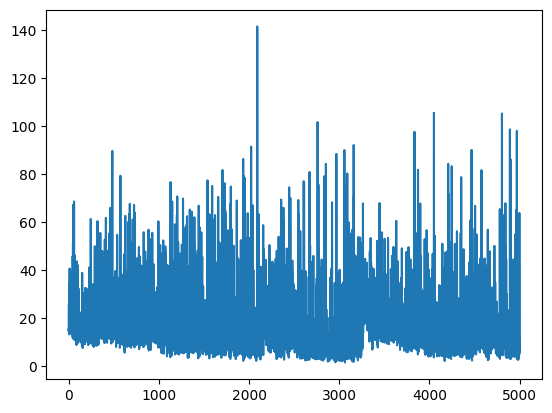

In [3]:
# plot losses

import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(policy_loss)
plt.show()

### Step3 - Play a game against the alphazero agent !

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from math import *
import numpy as np
import random

import MCTSwithRL # MCTS aided by Actor-Critic RL

from copy import copy
import random

# load the saved policy
saved_policy_alphazero_6by6 = torch.load('policy_6-6-4-pie-4500_tictactoe.pth')


def Policy_Player_MCTS(game):
    tree = MCTSwithRL.Node(copy(game))
    for _ in range(1000): # explore the tree 1000 steps
        tree.explore(saved_policy_alphazero_6by6) # This will compute all the U s, pick the branch with max U, search, 
                               # expand, backpropagate and increase the visit count
   
    treenext, (v, nn_v, p, nn_p) = tree.next(temperature=0.1) # Asking the tree to choose a next move based on the visit counts
        
    return treenext.game.last_move # returns the move after incrementing the Tree



#### Alphazero agent as the second player

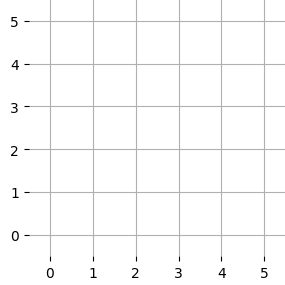

In [4]:
from ConnectN import ConnectN
game_setting = {'size':(6,6), 'N':4, 'pie_rule':True}
#%matplotlib notebook
%matplotlib widget

from Play import Play

# as first player
gameplay=Play(ConnectN(**game_setting), 
              player1=None, 
              player2=Policy_Player_MCTS)

#### Alphazero agent as first player

/Users/tamoghnadas/github_new/RL_Projects_my_own/alphazero-TicTacToe/MCTSwithRL.py:71: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/IndexingUtils.h:28.)
  return game.available_moves(), tinv(prob)[mask].view(-1), v.squeeze().squeeze()#reverse rot/reflection is applied on prob


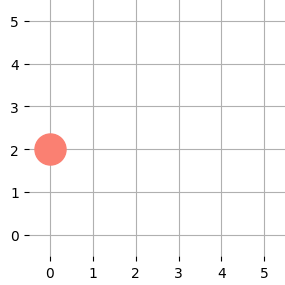

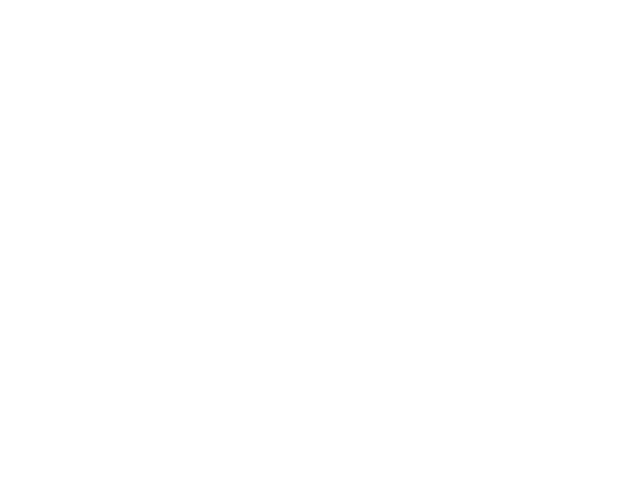

In [2]:
from ConnectN import ConnectN
game_setting = {'size':(6,6), 'N':4, 'pie_rule':True}
#%matplotlib notebook
%matplotlib widget

from Play import Play

# as first player
gameplay=Play(ConnectN(**game_setting), 
              player1=Policy_Player_MCTS, 
              player2=None)

### Alphazero by alphazero

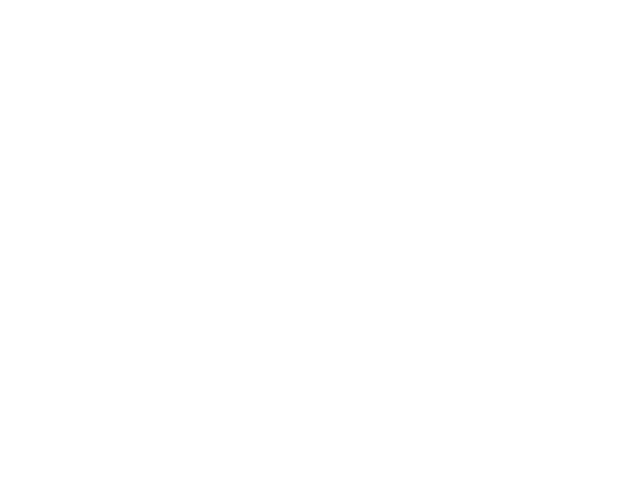

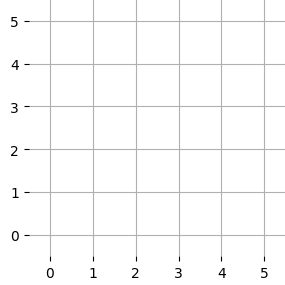

In [2]:
from ConnectN import ConnectN
game_setting = {'size':(6,6), 'N':4, 'pie_rule':True}
#%matplotlib notebook
%matplotlib widget

from Play import Play

# as first player
gameplay=Play(ConnectN(**game_setting), 
              player1=Policy_Player_MCTS, 
              player2=Policy_Player_MCTS)